<a href="https://colab.research.google.com/github/BhagyaSree12/CNN_Breast_Cancer_/blob/main/Another_copy_of_Copy_of_Untitled31_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os
import shutil
os.listdir("/content/drive/MyDrive/breast_cancer/Breast Cancer Patients MRI's")

['train', 'validation']

In [19]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
IMG_SHAPE  = 224
batch_size = 32

without vgg16

In [21]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

base_model.summary()

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])


from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

# load and iterate training dataset
train_it = datagen.flow_from_directory("/content/drive/MyDrive/breast_cancer/Breast Cancer Patients MRI's/train",
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode='binary',
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory("/content/drive/MyDrive/breast_cancer/Breast Cancer Patients MRI's/validation",
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      class_mode='binary',
                                      batch_size=8)

h1= model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)

Found 1410 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/20
12/12 [==============================] - 5s 235ms/step - loss: 1.7782 - binary_accuracy: 0.4479 - val_loss: 2.7560 - val_binary_accuracy: 0.3438
Epoch 2/20
12/12 [==============================] - 7s 570ms/step - loss: 1.1557 - binary_accuracy: 0.4688 - val_loss: 1.5646 - val_binary_accuracy: 0.3438
Epoch 3/20
12/12 [==============================] - 3s 221ms/step - loss: 0.9943 - binary_accuracy: 0.5556 - val_loss: 1.4197 - val_binary_accuracy: 0.3125
Epoch 4/20
12/12 [==============================] - 4s 264ms/step - loss: 1.0951 - binary_accuracy: 0.5000 - val_loss: 1.5248 - val_binary_accuracy: 0.3438
Epoch 5/20
12/12 [==============================] - 5s 271ms/step - loss: 1.0557 - binary_accuracy: 0.4271 - val_loss: 1.6781 - val_binary_accuracy: 0.3125
Epoch 6/20
12/12 [==============================] - 4s 240ms/step - loss: 1.0165 - binary_accuracy: 0.4688 - val_loss: 1.8057 - val_binary

with vgg16

In [23]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .000001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy','Precision','Recall','AUC'])

history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)

Epoch 1/20
12/12 [==============================] - 8s 311ms/step - loss: 0.6239 - accuracy: 0.6458 - precision: 0.6757 - recall: 0.5319 - auc: 0.6719 - val_loss: 1.5435 - val_accuracy: 0.4375 - val_precision: 0.5294 - val_recall: 0.4737 - val_auc: 0.3623
Epoch 2/20
12/12 [==============================] - 4s 253ms/step - loss: 0.6234 - accuracy: 0.6875 - precision: 0.7407 - recall: 0.4651 - auc: 0.7080 - val_loss: 1.5586 - val_accuracy: 0.3750 - val_precision: 0.3636 - val_recall: 0.2353 - val_auc: 0.2843
Epoch 3/20
12/12 [==============================] - 4s 264ms/step - loss: 0.6429 - accuracy: 0.6146 - precision: 0.6500 - recall: 0.5306 - auc: 0.6615 - val_loss: 1.5482 - val_accuracy: 0.4688 - val_precision: 0.5333 - val_recall: 0.4444 - val_auc: 0.4484
Epoch 4/20
12/12 [==============================] - 5s 309ms/step - loss: 0.6524 - accuracy: 0.7083 - precision: 0.7353 - recall: 0.5682 - auc: 0.7183 - val_loss: 1.5147 - val_accuracy: 0.4062 - val_precision: 0.3333 - val_recall: 0

In [24]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model


In [25]:

import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
IMG_SHAPE  = 224
batch_size = 32

resnet50

In [27]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.000001),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy','Precision','Recall','AUC'])
history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=50)


Epoch 1/50
12/12 [==============================] - 7s 297ms/step - loss: 0.4447 - accuracy: 0.8021 - precision: 0.8529 - recall: 0.6744 - auc: 0.8219 - val_loss: 1.9186 - val_accuracy: 0.3438 - val_precision: 0.4118 - val_recall: 0.3889 - val_auc: 0.3571
Epoch 2/50
12/12 [==============================] - 5s 263ms/step - loss: 0.4345 - accuracy: 0.8222 - precision: 0.9355 - recall: 0.6744 - auc: 0.8370 - val_loss: 1.6207 - val_accuracy: 0.4062 - val_precision: 0.4375 - val_recall: 0.4118 - val_auc: 0.3706
Epoch 3/50
12/12 [==============================] - 4s 267ms/step - loss: 0.3837 - accuracy: 0.8021 - precision: 0.8974 - recall: 0.7000 - auc: 0.8678 - val_loss: 1.4710 - val_accuracy: 0.4375 - val_precision: 0.5556 - val_recall: 0.5000 - val_auc: 0.3667
Epoch 4/50
12/12 [==============================] - 4s 267ms/step - loss: 0.4210 - accuracy: 0.8021 - precision: 0.9024 - recall: 0.7115 - auc: 0.8472 - val_loss: 1.3704 - val_accuracy: 0.4688 - val_precision: 0.4762 - val_recall: 0

transfer siamese+resnet

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the base ResNet-50 network (shared by both input branches)
def create_base_network(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze the weights of the pre-trained ResNet layers
    return base_model

# Define the two input branches of the Siamese Network
input_shape = (224, 224, 3)  # Input shape for your images
left_input = Input(shape=input_shape)
right_input = Input(shape=input_shape)

# Create two separate base networks (shared weights) for both inputs
base_network = create_base_network(input_shape)
left_output = base_network(left_input)
right_output = base_network(right_input)

# Define the distance metric (Euclidean distance) between the outputs of the base networks
distance = Lambda(lambda x: tf.keras.backend.abs(x[0] - x[1]))([left_output, right_output])

# Create the final Siamese Network model
siamese_model = Model(inputs=[left_input, right_input], outputs=distance)

# Unfreeze the base ResNet model for fine-tuning
base_network.trainable = True

# Compile the Siamese Network with a very low learning rate and binary cross-entropy loss
siamese_model.compile(optimizer=Adam(lr=0.000001),
                      loss='binary_crossentropy',
                      metrics=['accuracy','Precision','Recall','AUC'])

# Print the model summary
siamese_model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 7, 7, 2048)           2358771   ['input_13[0][0]',            
                                                          2          'input_14[0][0]']            
                                                                                                  
 lambda_2 (Lambda)           (None, 7, 7, 2048)           0         ['resnet50[0][0]',      

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Load a pre-trained ResNet-50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the two input branches of the Siamese Network
input_shape = (224, 224, 3)
left_input = Input(shape=input_shape)
right_input = Input(shape=input_shape)

# Apply the same base ResNet model for both inputs
left_output = base_model(left_input)
right_output = base_model(right_input)

# Define the distance metric (Euclidean distance) between the outputs of the base networks
distance = Lambda(lambda x: tf.keras.backend.abs(x[0] - x[1]))([left_output, right_output])

# Create the Siamese Network model
siamese_model = Model(inputs=[left_input, right_input], outputs=distance)

# Unfreeze the base ResNet model for fine-tuning
base_model.trainable = True

# Compile the Siamese Network with a very low learning rate and binary cross-entropy loss
siamese_model.compile(optimizer=RMSprop(learning_rate=0.000001),
                      loss='binary_crossentropy',
                      metrics=['accuracy','Precision','Recall','AUC'])

# Print the model summary
siamese_model.summary()

# Training the Siamese Network using your data generators
# history = .fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)

history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_18 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 7, 7, 2048)           2358771   ['input_17[0][0]',            
                                                          2          'input_18[0][0]']            
                                                                                                  
 lambda_3 (Lambda)           (None, 7, 7, 2048)           0         ['resnet50[0][0]',      

crnn

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.layers import TimeDistributed

# Define CRNN model
def create_CRNN_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Reshape for LSTM layers
    model.add(Reshape((-1, 64)))

    # Recurrent layers
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.5))

    # TimeDistributed layer for sequence output
    model.add(TimeDistributed(Dense(num_classes, activation='softmax')))

    return model

# Example usage
input_shape = (224, 224, 3)  # Adjust input shape based on your MRI image dimensions
num_classes = 2  # Assuming binary classification (e.g., disease progression or not)

# Create CRNN model
crnn_model = create_CRNN_model(input_shape, num_classes)

# Compile the model
crnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC','F1'])

# Print model summary
crnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 reshape_2 (Reshape)         (None, 3136, 64)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 3136, 256)        

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.optimizers import Adam

# Define CRNN model
def create_CRNN_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Reshape for LSTM layers
    model.add(Reshape((-1, 64)))

    # Recurrent layers
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.5))

    # TimeDistributed layer for sequence output
    model.add(TimeDistributed(Dense(num_classes, activation='softmax')))

    return model

# Example usage
input_shape = (224, 224, 3)  # Adjust input shape based on your MRI image dimensions
num_classes = 2  # Assuming binary classification (e.g., disease progression or not)

# Create CRNN model
crnn_model = create_CRNN_model(input_shape, num_classes)

# Compile the model
crnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC','F1'])

# Print model summary
crnn_model.summary()

# Train the model
epochs = 30  # Set the number of epochs
# Assuming you have train_data and validation_data for training and validation sets
history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=36)

# # Evaluate the model on test data
# test_loss, test_accuracy = crnn_model.evaluate(test_data)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 reshape_3 (Reshape)         (None, 3136, 64)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 3136, 256)        

1/1 [==============================] - 0s 132ms/step
[[-0.3301078]]
THE UPLOADED IMAGE IS SUSPECTED AS: Healthy


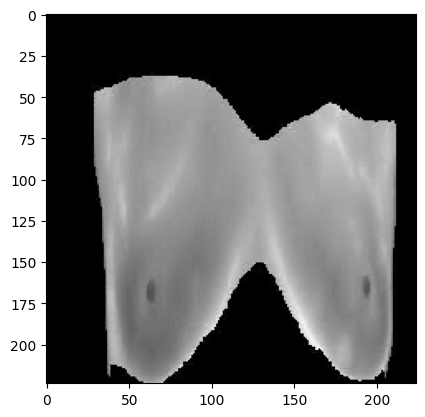

In [32]:
img = image.load_img("/content/drive/MyDrive/breast_cancer/Breast Cancer Patients MRI's/validation/Healthy/S_66.jpg",target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Healthy"
else:
      op="Cancer"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))